<a href="https://colab.research.google.com/github/mollah2022/Neural-Network/blob/main/Credit_Card_07_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install imbalanced-learn

Epoch 1/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9818 - loss: 0.0519 - val_accuracy: 0.9980 - val_loss: 0.0075
Epoch 2/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9978 - loss: 0.0078 - val_accuracy: 0.9973 - val_loss: 0.0080
Epoch 3/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9986 - loss: 0.0048 - val_accuracy: 0.9992 - val_loss: 0.0034
Epoch 4/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9991 - loss: 0.0034 - val_accuracy: 0.9992 - val_loss: 0.0033
Epoch 5/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9991 - loss: 0.0030 - val_accuracy: 0.9994 - val_loss: 0.0024
Epoch 6/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9994 - val_loss: 0.0022
Epoch 7/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9994 - loss: 0.0021 - val_accuracy: 0.9994 - val_loss: 0.0025
Epoch 8/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 

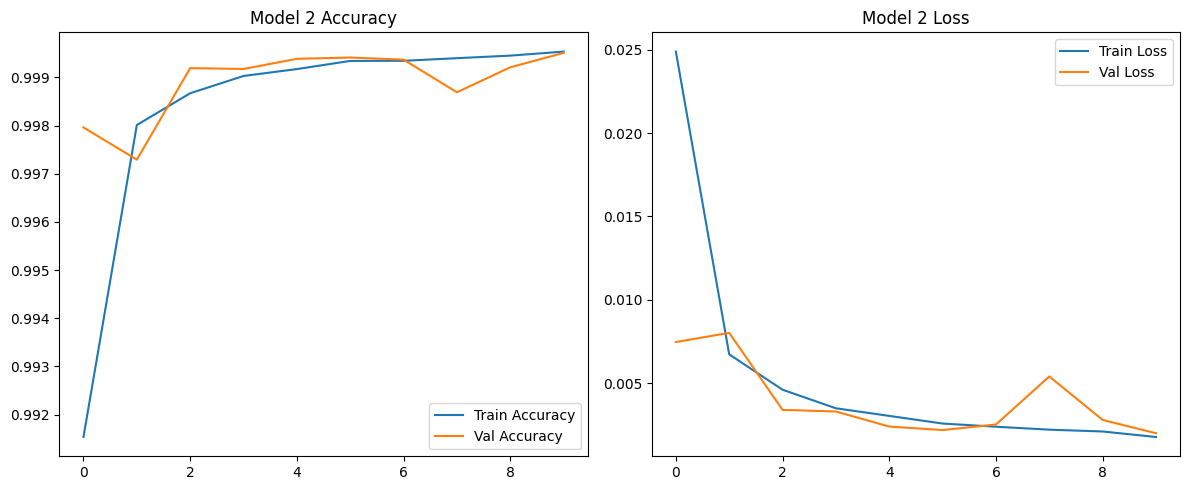

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")  # Replace with your actual file name
X = df.drop('Class', axis=1)
y = df['Class']

# Balance the data using SMOTE
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Moderate Neural Network Model
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluation
y_pred2 = (model2.predict(X_test_scaled) > 0.5).astype("int32")
print("Model 2 Report:")
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Val Accuracy')
plt.title('Model 2 Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Val Loss')
plt.title('Model 2 Loss')
plt.legend()
plt.tight_layout()
plt.show()
